In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings

In [6]:
warnings.filterwarnings("ignore")

In [7]:
data=pd.read_csv('./NN_data.csv')

In [8]:
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [9]:
data.sample()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
809,2014-05-16 00:00:00,250000.0,3.0,2.0,1900,6660,1.0,0,0,5,950,950,1966,0,27022 216th Ave SE,Maple Valley,WA 98038,USA


In [10]:
data.shape

(4600, 18)

In [11]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [13]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

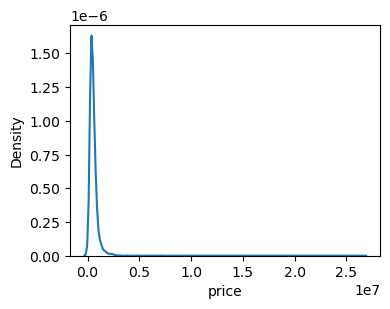

In [14]:
plt.figure(figsize=(4,3))
sns.kdeplot(data.price)
plt.show()

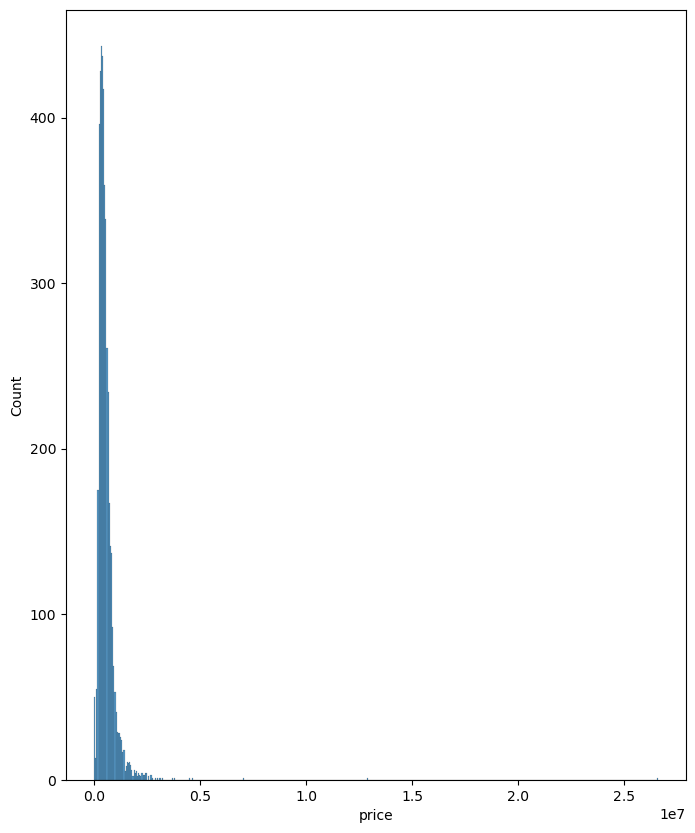

In [15]:
plt.figure(figsize=(8,10))
sns.histplot(data.price, bins=500)
plt.show()

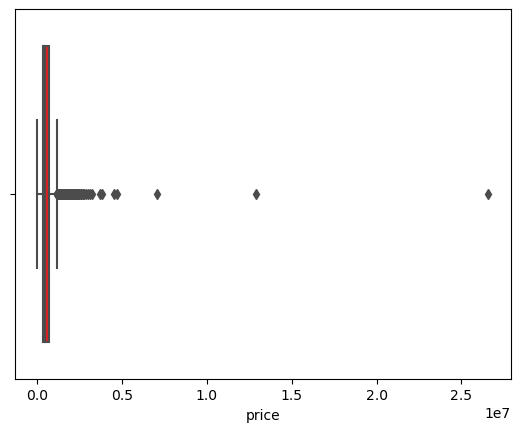

In [16]:
sns.boxplot(data.price, color='red')
plt.show()

In [17]:
to_drop = ['date', 'street', 'statezip', 'country']

In [18]:
data.drop(columns=to_drop, inplace=True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle


### Calculating the age of the house

In [19]:
data[data['yr_renovated']!=0]['yr_renovated'].min()

1912

In [20]:
## How old is the house?
data['House_age'] = [2021 - yr_built for yr_built in data['yr_built']]

In [21]:
data.House_age

0        66
1       100
2        55
3        58
4        45
       ... 
4595     67
4596     38
4597     12
4598     47
4599     31
Name: House_age, Length: 4600, dtype: int64

In [27]:
### was the house renovated?
data['Was_renovated'] = [1 if yr_renovated !=0 else 0 for yr_renovated in data['yr_renovated']]

In [28]:
data['Was_renovated']

0       1
1       0
2       0
3       0
4       1
       ..
4595    1
4596    1
4597    0
4598    0
4599    0
Name: Was_renovated, Length: 4600, dtype: int64

In [31]:
## Is the house renovated recent?
data['renovated_recent'] = [1 if yr_renovated <=10 else 0 for yr_renovated in data['yr_renovated']]

In [30]:
data['renovated_recent']

0       0
1       1
2       1
3       1
4       0
       ..
4595    0
4596    0
4597    1
4598    1
4599    1
Name: renovated_recent, Length: 4600, dtype: int64

In [32]:
data.drop(columns='yr_renovated', inplace=True)

In [33]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city,House_age,Was_renovated,renovated_recent
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,Shoreline,66,1,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,Seattle,100,0,1
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,Kent,55,0,1
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,Bellevue,58,0,1
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,Redmond,45,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,Seattle,67,1,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,Bellevue,38,1,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,Renton,12,0,1
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,Seattle,47,0,1


In [34]:
data.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [42]:
data[data['price'] ==0].shape

(49, 16)

In [36]:
data[data['price'] !=0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city,House_age,Was_renovated,renovated_recent
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,Shoreline,66,1,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,Seattle,100,0,1
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,Kent,55,0,1
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,Bellevue,58,0,1
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,Redmond,45,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,Seattle,67,1,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,Bellevue,38,1,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,Renton,12,0,1
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,Seattle,47,0,1
